In [116]:
%run clean_data.py

In [117]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [118]:
# Load the data
imdb_all_years_df = pd.read_csv("./Resources/cleaned_data.csv")
imdb_all_years_df.info()
imdb_all_years_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13098 entries, 0 to 13097
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  13098 non-null  object 
 1   Movie Link             13098 non-null  object 
 2   Year                   13098 non-null  int64  
 3   Duration               13069 non-null  object 
 4   MPA                    12042 non-null  object 
 5   Rating                 13079 non-null  float64
 6   Votes                  13079 non-null  object 
 7   budget                 6064 non-null   float64
 8   grossWorldWide         8406 non-null   float64
 9   gross_US_Canada        8483 non-null   float64
 10  opening_weekend_Gross  7415 non-null   float64
 11  directors              13098 non-null  object 
 12  writers                13098 non-null  object 
 13  stars                  13098 non-null  object 
 14  genres                 13098 non-null  object 
 15  co

,Title,Movie Link,Year,Duration,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,...,stars,genres,countries_origin,filming_locations,production_companies,Languages,wins,nominations,oscars,release_date
0,Swiss Family Robinson,Swiss Family Robinson,1960,2h 6m,Approved,7.1,19K,5000000.0,40357287.0,40356000.0,...,"['John Mills', 'Dorothy McGuire', 'James MacAr...","['Survival', 'Adventure', 'Family']",['United States'],"['Tobago, Trinidad and Tobago']",['Walt Disney Productions'],"['English', 'Malay']",0,0,0,1960.0
1,Psycho,Psycho,1960,1h 49m,R,8.5,741K,806947.0,32066835.0,32000000.0,...,"['Anthony Perkins', 'Janet Leigh', 'Vera Miles']","['Psychological Horror', 'Psychological Thrill...",['United States'],"['Psycho House and Bates Motel, Backlot Univer...","['Alfred J. Hitchcock Productions', 'Shamley P...",['English'],0,14,4,1960.0
2,The Apartment,The Apartment,1960,2h 5m,Approved,8.3,204K,3000000.0,18778738.0,18600000.0,...,"['Jack Lemmon', 'Shirley MacLaine', 'Fred MacM...","['Farce', 'Holiday Comedy', 'Holiday Romance',...",['United States'],"['Majestic Theater, 247 West 44th Street, Manh...",['The Mirisch Corporation'],['English'],0,8,0,1960.0
3,Spartacus,Spartacus,1960,3h 17m,PG-13,7.9,146K,12000000.0,1846975.0,1830650.0,...,"['Kirk Douglas', 'Laurence Olivier', 'Jean Sim...","['Adventure Epic', 'Historical Epic', 'Sword &...",['United States'],"['Hearst Castle, San Simeon, California, USA']",['Bryna Productions'],['English'],0,11,0,1960.0
4,The Pusher,The Pusher,1960,1h 21m,Not Rated,6.2,168,NaN,1656.0,1656.0,...,"['Kathy Carlyle', 'Robert Lansing', 'Felice Or...","['Crime', 'Drama']",['United States'],"['113 East 115 Street, New York City, New York...",['Milford/Carlyle Productions'],['English'],0,0,0,1960.0


In [119]:
# Ensure 'grossWorldWide' is numeric (handle missing values and potential strings)
imdb_all_years_df["grossWorldWide"] = pd.to_numeric(imdb_all_years_df["grossWorldWide"], errors="coerce")

# Group by 'Year' and sum the 'grossWorldWide' revenue
global_box_office_by_year = imdb_all_years_df.groupby("Year")["grossWorldWide"].sum().reset_index()

# Display the first few rows
print(global_box_office_by_year.head())

   Year  grossWorldWide
0  1960      97455237.0
1  1961     291040677.0
2  1962       3471307.0
3  1963      72833402.0
4  1964     229541486.0


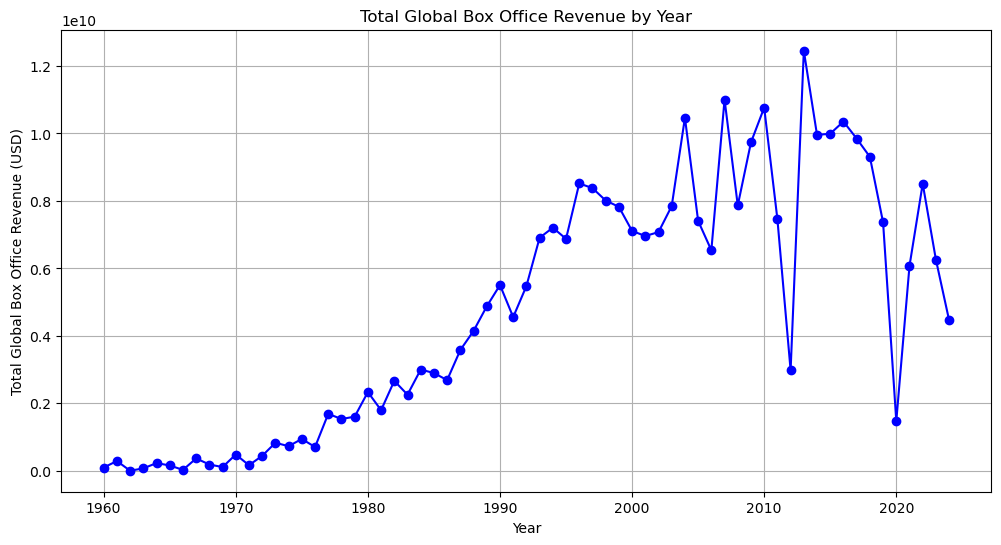

In [120]:
plt.figure(figsize=(12, 6))
plt.plot(global_box_office_by_year["Year"], global_box_office_by_year["grossWorldWide"], marker="o", linestyle="-", color="b")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Total Global Box Office Revenue (USD)")
plt.title("Total Global Box Office Revenue by Year")
plt.grid(True)

# Show the plot
plt.show()

In [121]:
# Ensure 'grossWorldWide' is numeric
imdb_all_years_df["grossWorldWide"] = pd.to_numeric(imdb_all_years_df["grossWorldWide"], errors="coerce")

# Drop any movies where 'grossWorldWide' is missing
imdb_all_years_df = imdb_all_years_df.dropna(subset=["grossWorldWide"])

# Explode genres so that each movie-genre pair gets its own row
#imdb_all_years_df["genres"] = imdb_all_years_df["genres"].astype(str)  # Ensure it's a string
#imdb_all_years_df["genres"] = imdb_all_years_df["genres"].str.split(", ")  # Split into list
#imdb_exploded = imdb_all_years_df.explode("genres")  # Creates a new row for each genre

# Ensure 'genres' is a string and split it into lists
'''imdb_all_years_df["genres"] = imdb_all_years_df["genres"].astype(str).replace('[',"").replace(']',"").str.split(",")
'''
# Remove brackets and split manually, ensuring no extra spaces
imdb_all_years_df["genres"] = imdb_all_years_df["genres"].astype(str)  # Ensure it's a string
imdb_all_years_df["genres"] = imdb_all_years_df["genres"].str.replace("[", "").str.replace("]", "").str.replace("'", "")

# Now split by comma and strip spaces
imdb_all_years_df["genres"] = imdb_all_years_df["genres"].apply(lambda x: [g.strip().title() for g in x.split(",")])

# Strip whitespace from each genre before exploding
#imdb_all_years_df["genres"] = imdb_all_years_df["genres"].apply(lambda x: [g.strip() for g in x])
# Now explode
imdb_exploded = imdb_all_years_df.explode("genres")
imdb_all_years_df["genres"].head()

0                        [Survival, Adventure, Family]
1    [Psychological Horror, Psychological Thriller,...
2    [Farce, Holiday Comedy, Holiday Romance, Roman...
3    [Adventure Epic, Historical Epic, Sword & Sand...
4                                       [Crime, Drama]
Name: genres, dtype: object

In [122]:
# Group by Year and Genre, summing worldwide gross
genre_box_office = (
    imdb_exploded.groupby(["Year", "genres"])["grossWorldWide"].sum().reset_index()
)

# Get total box office per year
total_box_office_by_year = (
    imdb_all_years_df.groupby("Year")["grossWorldWide"].sum().reset_index()
)

# Merge to compute percentages
genre_box_office = genre_box_office.merge(
    total_box_office_by_year, on="Year", suffixes=("_genre", "_total")
)

# Compute percentage of total revenue for each genre
genre_box_office["percent_of_total"] = (
    genre_box_office["grossWorldWide_genre"] / genre_box_office["grossWorldWide_total"]
) * 100

# Preview results
print(genre_box_office.head())


   Year             genres  grossWorldWide_genre  grossWorldWide_total  \
0  1960             Action               13050.0            97455237.0   
1  1960          Adventure            42216914.0            97455237.0   
2  1960     Adventure Epic             1846975.0            97455237.0   
3  1960          Biography             1846975.0            97455237.0   
4  1960  Classical Western             4369797.0            97455237.0   

   percent_of_total  
0          0.013391  
1         43.319287  
2          1.895203  
3          1.895203  
4          4.483902  


In [123]:
# Count the number of movies per genre per year
genre_counts = imdb_exploded.groupby(["Year", "genres"]).size().reset_index(name="movie_count")

# Merge with genre revenue data
genre_box_office = genre_box_office.merge(genre_counts, on=["Year", "genres"])

# Filter out genres with fewer than 4 movies per year
genre_box_office = genre_box_office[genre_box_office["movie_count"] >= 6]





<Figure size 2400x600 with 0 Axes>

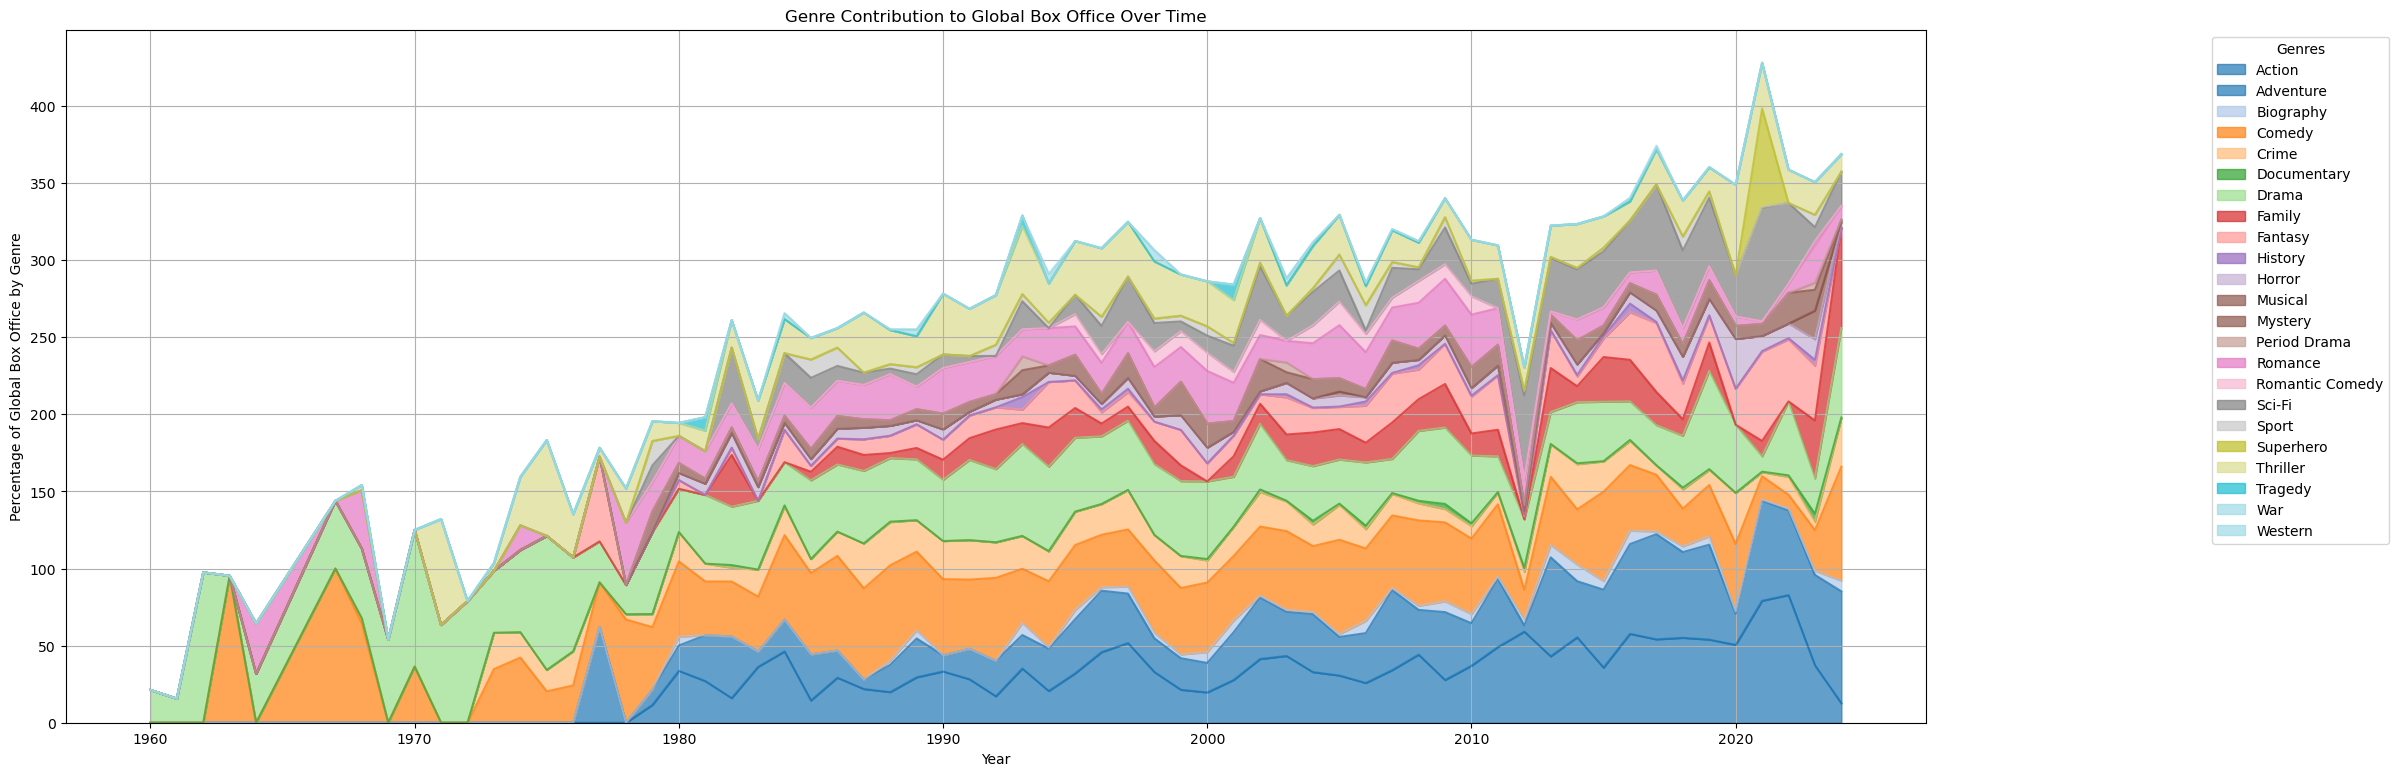

In [ ]:
# Filter out genres with fewer than 4 movies per year and genres that are not relevant or redundant
genre_box_office = genre_box_office[genre_box_office["movie_count"] >= 6]
genre_box_office = genre_box_office[genre_box_office["genres"] != "Animal Adventure"]
genre_box_office = genre_box_office[genre_box_office["genres"] != "Buddy Comedy"]
genre_box_office = genre_box_office[genre_box_office["genres"] != "Feel-Good Romance"]
genre_box_office = genre_box_office[genre_box_office["genres"] != "Docudrama"]
genre_box_office = genre_box_office[genre_box_office["genres"] != "Political Thriller"]
genre_box_office = genre_box_office[genre_box_office["genres"] != "News"]
genre_box_office = genre_box_office[genre_box_office["genres"] != "Slapstick"]
genre_box_office = genre_box_office[genre_box_office["genres"] != "Slasher Horror"]
genre_box_office = genre_box_office[genre_box_office["genres"] != "Space Sci-Fi"]
genre_box_office = genre_box_office[genre_box_office["genres"] != "Supernatural Horror"]
genre_box_office = genre_box_office[genre_box_office["genres"] != "Teen Comedy"]
genre_box_office = genre_box_office[genre_box_office["genres"] != "Teen Drama"]
genre_box_office = genre_box_office[genre_box_office["genres"] != "Teen Horror"]
genre_box_office = genre_box_office[genre_box_office["genres"] != "Coming-Of-Age"]
genre_box_office = genre_box_office[genre_box_office["genres"] != "Dark Comedy"]
genre_box_office = genre_box_office[genre_box_office["genres"] != "Music"]
genre_box_office = genre_box_office[genre_box_office["genres"] != "Satire"]
genre_box_office = genre_box_office[genre_box_office["genres"] != "Parody"]
genre_box_office = genre_box_office[genre_box_office["genres"] != "Psychological Thriller"]
genre_box_office = genre_box_office[genre_box_office["genres"] != "Psychological Drama"]
genre_box_office = genre_box_office[genre_box_office["genres"] != "Animation"]
# Pivot the data for stacked area chart
pivot_genre = genre_box_office.pivot(index="Year", columns="genres", values="percent_of_total").fillna(0)

# Plot the stacked area chart
plt.figure(figsize=(24, 6))
pivot_genre.plot(kind="area", stacked=True, colormap="tab20", alpha=0.7, figsize=(24, 9))

# Move the legend further to the right
plt.legend(loc="upper left", bbox_to_anchor=(1.15, 1), title="Genres")

# # Twin plot for total box office revenue
# plt.twinx()
# plt.plot(total_box_office_by_year["Year"], total_box_office_by_year["grossWorldWide"], 
#          marker="o", linestyle="-", color="black", label="Total Global Box Office")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Percentage of Global Box Office by Genre")
plt.title("Genre Contribution to Global Box Office Over Time")
plt.grid(True)
# Show the plot
plt.show()
